# Introduction to Pandas

`pandas` are the Python library for **data science**

- Powerful Python library for data **manipulation** and **analysis**
- Works with tabulated data
- Combines features of lists, `numpy` arrays, and dictionaries

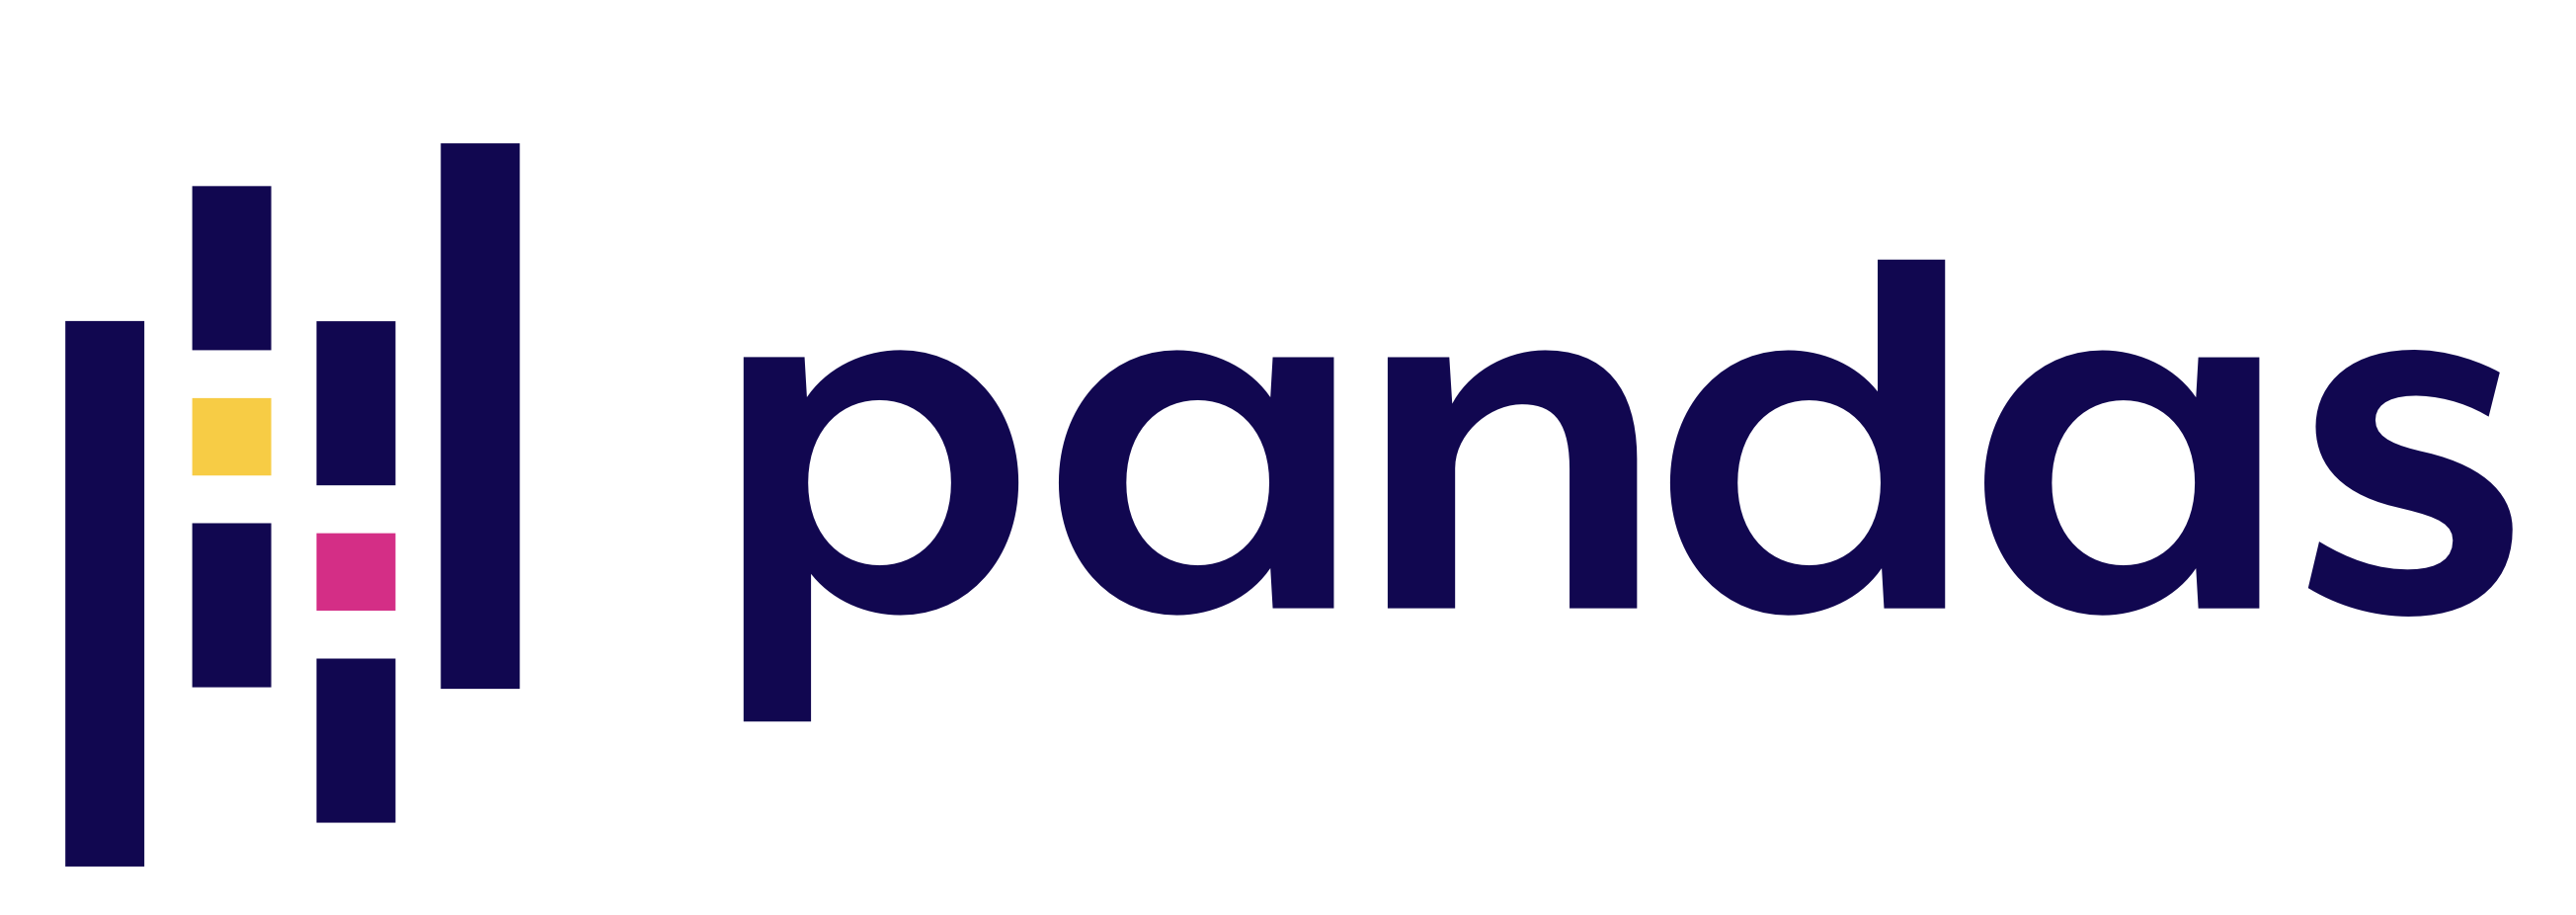

In [2]:
import pandas as pd

## Powerful tables: The Pandas DataFrame

Tables are the simplest way to store data:

- every line is an **observation**
- every column represents a **type of measurement**

Tables in Pandas are a new **object**: the `DataFrame`

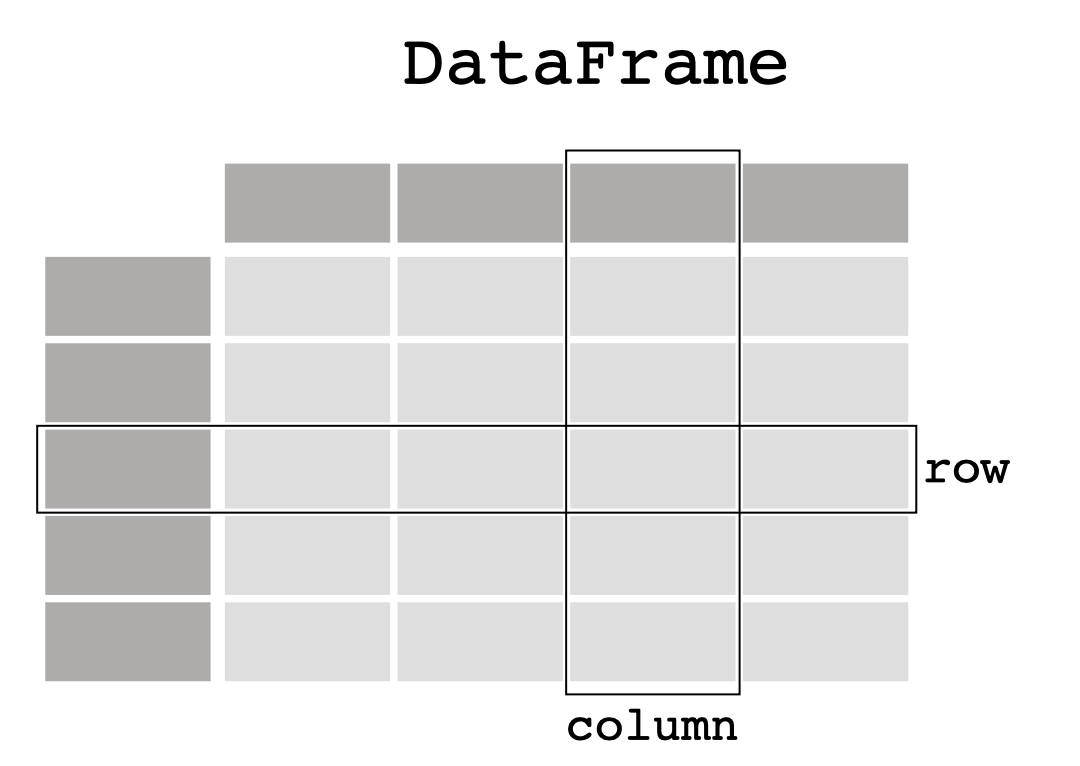

## Powerful tables: The Pandas DataFrame

`pandas` is nice because it can read and write tables from many existing formats, removing the worry of dealing with format specifications

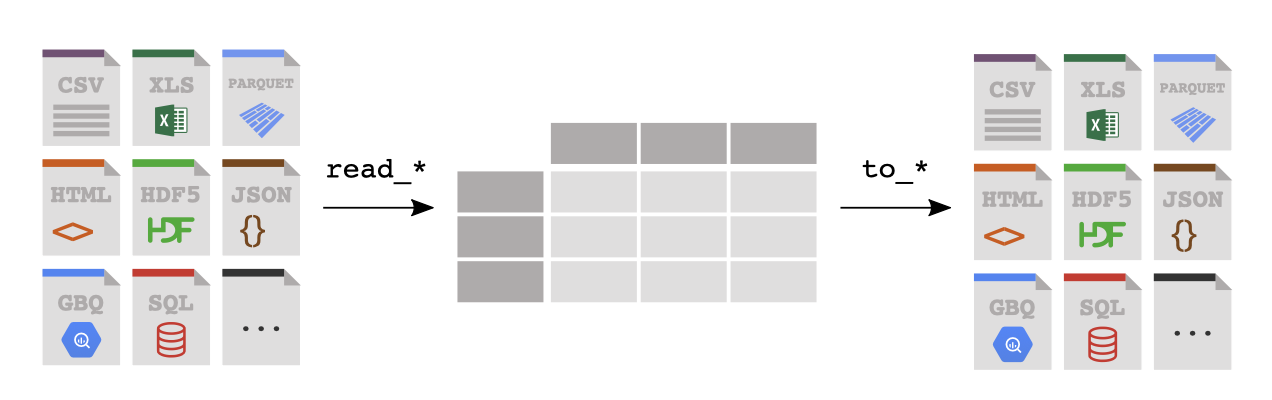


# Powerful tables: The Pandas DataFrame

- `DataFrame`: A table with rows and columns. The rows are called **indices**  and every column is a **Series**
- It can be created in many ways: e.g. from dictionaries (keys = column names)


In [8]:
molecule_data = {"formula": ["CH4", "C2H6", "C3H8"],
                 "name": ["methane", "ethane", "propane"], 
                 "mol_mass": [16., 30.1, 44.1]}

df = pd.DataFrame(molecule_data)
df

,formula,name,mol_mass
0,CH4,methane,16.0
1,C2H6,ethane,30.1
2,C3H8,propane,44.1


# Indices can be named in Pandas and accessed using locators

- Index labels each row (default: 0, 1, 2...)
- Set meaningful labels using `set_index()`
- Access rows using the locator notation `.loc[]`

In [9]:
df = df.set_index("formula") # Set the 'formula' column as the index
print(df)
print("\nAccessing a row:")
df.loc["CH4"]

            name  mol_mass
formula                   
CH4      methane      16.0
C2H6      ethane      30.1
C3H8     propane      44.1

Accessing a row:


name        methane
mol_mass       16.0
Name: CH4, dtype: object

# Working with Columns

- Columns accessed like **dictionary keys**, by using their names
- Each column is a pandas **Series**
- Series = 1D DataFrame with an index

In [10]:
# Access a column
mass_column = df["mol_mass"]
print(mass_column)
print(f"\nType: {type(mass_column)}")

formula
CH4     16.0
C2H6    30.1
C3H8    44.1
Name: mol_mass, dtype: float64

Type: <class 'pandas.core.series.Series'>


# Accessing Individual Values

The best way to access individual values in a DataFrame is to use locators:

- `.loc[row, column]`
- Comma-separated indexing (like numpy)

This leverages the tabular structure of DataFrames for easy data retrieval.

In [14]:
value = df.loc["CH4", "mol_mass"]
value
# compare with full df
df

,name,mol_mass
formula,,
CH4,methane,16.0
C2H6,ethane,30.1
C3H8,propane,44.1


# Arithmetic Operations

- Pandas allows for powerful vectorised operations: apply operations to entire columns at once

In [15]:
# Divide all values by 2
print(df["mol_mass"] / 2)

# Combine two Series
carbon_atoms = pd.Series([1, 2, 3], index=df.index)
print("\nMass per carbon atom:")
print(df["mol_mass"] / carbon_atoms)

formula
CH4      8.00
C2H6    15.05
C3H8    22.05
Name: mol_mass, dtype: float64

Mass per carbon atom:
formula
CH4     16.00
C2H6    15.05
C3H8    14.70
dtype: float64


# Statistical Operations

Pandas is often used to perform statistical analysis on datasets.
- Built-in statistical methods
- `.mean()`, `.sum()`, `.max()`, `.min()`, `.describe()`, etc.
- `.idxmax()` returns index of maximum value

In [18]:
df.describe() #provides a summary of statistics for numerical columns

,mol_mass
count,3.000000
mean,30.066667
std,14.050030
min,16.000000
25%,23.050000
50%,30.100000
75%,37.100000
max,44.100000


# Expanding dataframes

- Assign new column like dictionary syntax
- Perform calculations between columns
- New data must match number of rows

In [20]:
city_data = {"city": ["Melbourne", "Mumbai", "Paris"],
             "population": [4850740, 20667665, 11078546],
             "area": [9992, 603, 105]}
# new dataframe with index set to "city"
city_df = pd.DataFrame(city_data).set_index("city")

# Add new column with calculation
city_df["pop_million"] = city_df["population"] / 1e6
city_df["density"] = city_df["pop_million"] / city_df["area"]
city_df

,population,area,pop_million,density
city,,,,
Melbourne,4850740,9992,4.850740,0.000485
Mumbai,20667665,603,20.667665,0.034275
Paris,11078546,105,11.078546,0.105510


# Filtering Data

Pandas also allows for rapidly filtering the table based on condions, whch leverage boolean statements:

- Create filter with comparison operators
- Returns True/False for each row
- Apply filter to Series or DataFrame

In [21]:
# Create filter as a boolean statement
high_pop_filter = city_df["pop_million"] > 10
print("Filter:\n", high_pop_filter)

# Apply filter
print("\nFiltered DataFrame:")
city_df[high_pop_filter]

Filter:
 city
Melbourne    False
Mumbai        True
Paris         True
Name: pop_million, dtype: bool

Filtered DataFrame:


,population,area,pop_million,density
city,,,,
Mumbai,20667665,603,20.667665,0.034275
Paris,11078546,105,11.078546,0.105510


# Multiple Conditions

Filtering can be complexified using dedicated binary operators:

- Use `&` (and) or `|` (or) operators
- Each condition in parentheses
- Combine multiple column filters

**Note.** Pandas uses `&` and `|` instead of `and` and `or` for element-wise operations because the latter are reserved for boolean logic in Python.

In [23]:
# Multiple conditions
filt = (city_df["pop_million"] > 4) & (city_df["area"] > 100)
city_df[filt]

,population,area,pop_million,density
city,,,,
Melbourne,4850740,9992,4.850740,0.000485
Mumbai,20667665,603,20.667665,0.034275
Paris,11078546,105,11.078546,0.105510


# Reading CSV Files

While most examples above used Dataframes created from dictionaries, real-world data is often stored in CSV files (or other standard tabulated formats).
Pandas provides easy-to-use functions to read these files into DataFrames:

- CSV = Comma Separated Values
- Use `pd.read_csv(filename)`
- Options: `skiprows`, `sep` (delimiter)

In [ ]:
from io import StringIO

# Example CSV data
csv_data = """Name,Age,City
Alice,25,Melbourne
Bob,30,Paris
Charlie,35,Tokyo"""

df_csv = pd.read_csv(StringIO(csv_data))
df_csv

# To sum up

`pandas` is a powerful tool that expands the Python toolkit further.

As for numpy, this means that for many basic problems you will be able to find ready-to-use recipies and solutions within `pandas`. 

The challenge is put the pieces together in a coherent way.


For your learning, the documentation is key

https://pandas.pydata.org/docs/getting_started

For `pandas`, LLM are great **tutors** so use them intelligently.



(To some of you already exposed to `R`, you will find some similarities along the way)